c:\users\s1250039\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:162: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


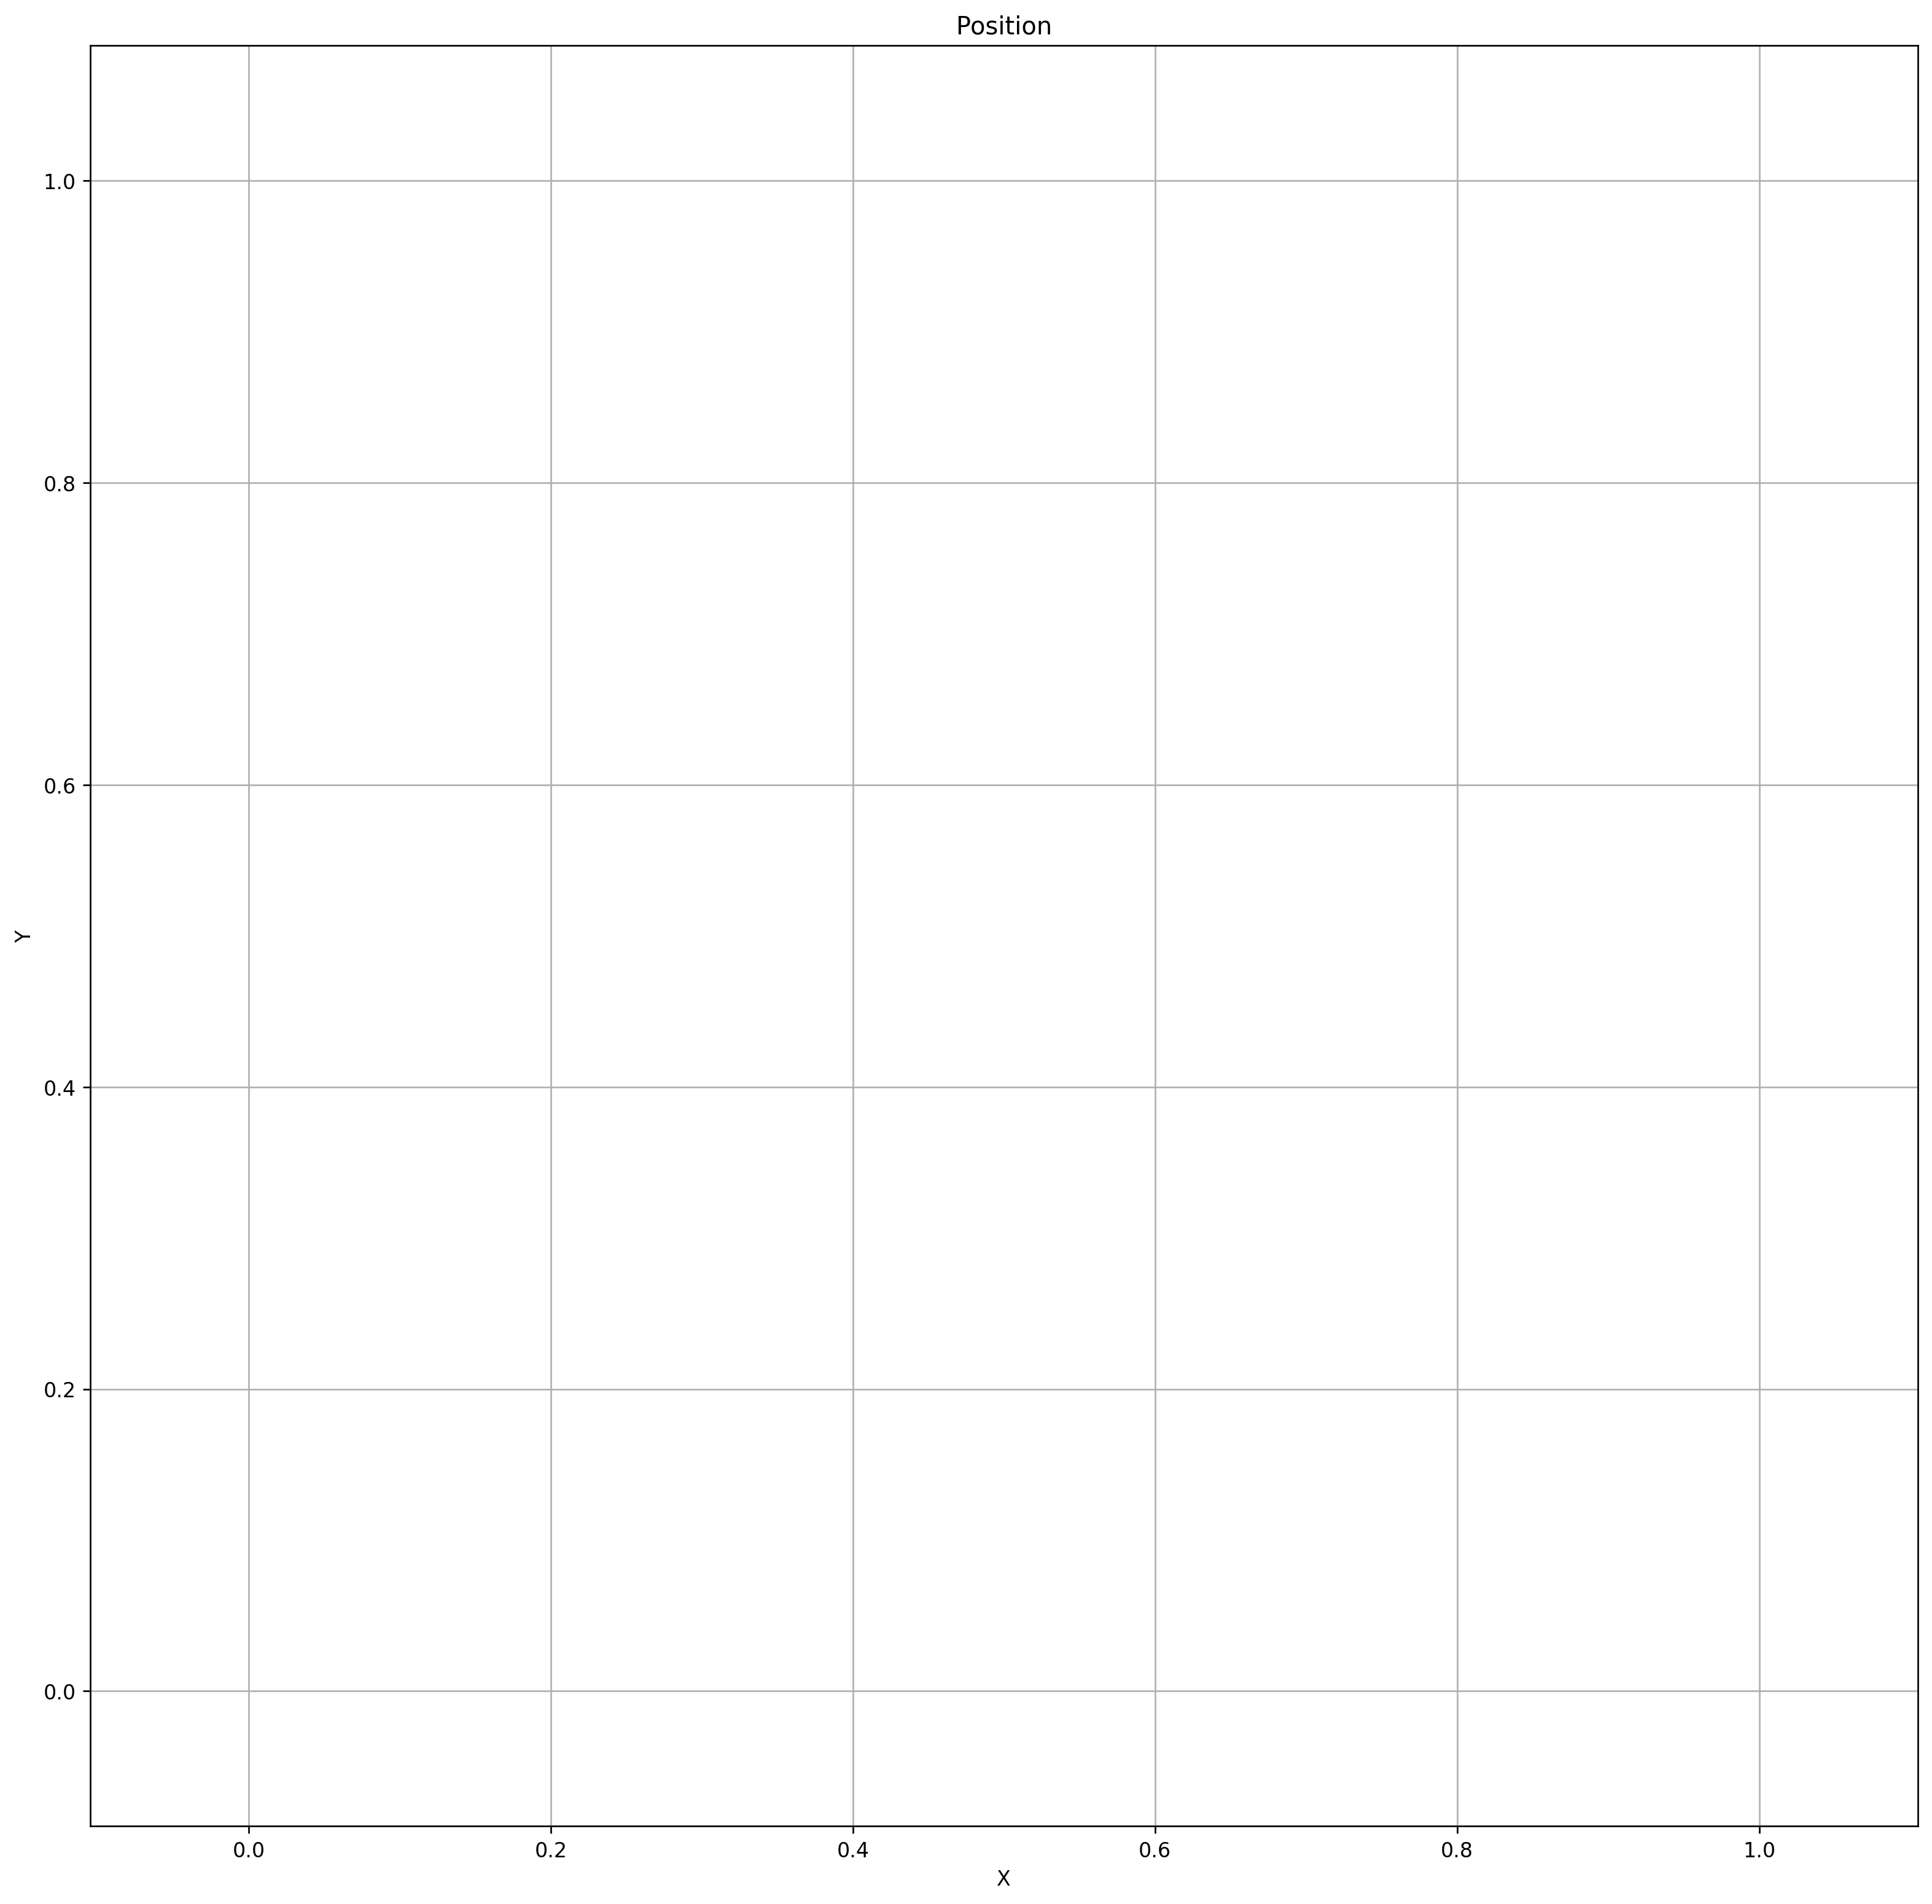

In [14]:
## SakiDocs jupyter
## tari@s1250039

## import文で外部のライブラリをインポートする。
## > import ライブラリ名 as 渾名
## いちいちmatplotlib.pyplotと打つのは面倒なのでpltと略す。
## なむぽよ～～～

# 一番最初の実行はグラフがうまく出ないかも


########## Import ##########

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


#################### Read CSV ####################

# 宣言について
# Pythonは動的型付けなので、変数の前に型を宣言する必要はない。
# オブジェクト志向?
# 変数の宣言
# > hensuu = value
# 配列の宣言
# > hayretz1 = []
# > hayretz2 = [yoso1, yoso2]

#0 : sensor
#1 : filtered
#2 : forward
#3 : turn
#4 : gyro
#5 : left motor angle
#6 : right motor angle
#7 : voltage
#8 : left motor pwm
#9 : right motor pwm

# CSVファイルから値を取り出してそれぞれの変数に格納する。
# forループについて
# > for line in file_lines
# file_linesを上からlineに格納する。
# file_linesの要素数だけル-プが回ったら終了。
# replaceについて
# 第1引数を第2引数で置換する。
# 文字列は改行込みで読み込まれるので、これを虚無で置換する。
# splitについて
# 読み込まれるデ-タはcsv形式なので、ｶﾝﾏｧが来たらそこでデータを分割する。
# float(line.replace("\n", "").split(",")[0]の[0]の基準は常に行の先頭。
# 何度読み込んでも変わらない。

##### Declare #####
raw_fltre = []
raw_flted = []
raw_fowrd = []
raw_turne = []
raw_gyroh = []
raw_mot_l = []
raw_mot_r = []
raw_voltg = []
raw_pwm_l = []
raw_pwm_r = []
raw_g_ofs = []
raw_theta = []
raw_pos_x = []
raw_pos_y = []
raw_speed = []

# Color List #
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf' , '#ff00ff', '#00ff00']

##### File Open #####

file = open("forward_190913_17.txt")
# readlinesでfileを1行づつ読み込んで、file_linesに格納する。
# 以下はファイル読み込み用配列
file_lines = file.readlines()

for line in file_lines:
    raw_fltre.append(float(line.replace("\n", "").split(",")[0]))
    raw_flted.append(float(line.replace("\n", "").split(",")[1]))
    raw_fowrd.append(float(line.replace("\n", "").split(",")[2]))
    raw_turne.append(float(line.replace("\n", "").split(",")[3]))
    raw_gyroh.append(float(line.replace("\n", "").split(",")[4]))
    raw_mot_l.append(float(line.replace("\n", "").split(",")[5]))
    raw_mot_r.append(float(line.replace("\n", "").split(",")[6]))
    raw_voltg.append(float(line.replace("\n", "").split(",")[7])) # mV
    raw_pwm_l.append(float(line.replace("\n", "").split(",")[8])) # -100~100 int
    raw_pwm_r.append(float(line.replace("\n", "").split(",")[9])) # -100~100 int
    raw_g_ofs.append(float(line.replace("\n", "").split(",")[10]))
    raw_theta.append(float(line.replace("\n", "").split(",")[11])) # Pi
    raw_pos_x.append(float(line.replace("\n", "").split(",")[12]))
    raw_pos_y.append(float(line.replace("\n", "").split(",")[13]))
    raw_speed.append(float(line.replace("\n", "").split(",")[14]))



#################### Standard Deviation ####################

##### Declare #####
std_fltre = []
std_flted = []
std_fowrd = []
std_turne = []
std_gyroh = []
std_mot_l = []
std_mot_r = []
std_g_ofs = []
std_theta = []
std_pos_x = []
std_pos_y = []
std_speed = []


#################### 1/10 ####################

# 取得した値の配列を10個飛ばしにする。(あとあとつかう)

##### Declare #####
ten_x_pos = []
ten_y_pos = []
ten_theta = []
ten_speed = []

##### Process #####
for xxx in range(0, len(x_position),100): #YYYは結局使わなかった
    ten_x_pos.append(x_position[xxx])
    ten_x_pos.append(y_position[xxx]) 
    ten_theta.append(theta[xxx])
    ten_speed.append(speed[xxx])



#################### plot ####################

# プロット

##### Declare #####
max_atayi = np.max(raw_speed)
min_atayi = np.min(raw_speed)
nom_atayi = []
raw_atayi = ten_speed#たしかスピィ＝ド
raw_shcnt = [] # 周回のsh, 中身は整数値
nom_theta = [] # ここに格納されるのは、範囲を0から2πにしたｽｨｰﾀｧ
π = np.pi

##### Graph Settings #####
plt_figre = plt.figure(figsize=(16,16), dpi=240) # figsize=(x, y)の単位はinch
plt_axes1= plt_figre.add_subplot(1,1,1)

x1 = ten_x_pos
y1 = y_position_t
x2 = np.cos(theta_t)
y2 = np.sin(theta_t)
plt.grid()
#ax.set_xlim(-150, 150)
#ax.set_ylim(-100, 100)
#ax.set_xticks(np.linspace(-150, 150, 31))
#ax.set_yticks(np.linspace(-100, 100, 21))
plt.axes().set_aspect('equal', 'datalim') # ぬけぬ
plt_axes1.set_title('Position')
plt_axes1.set_xlabel('X')
plt_axes1.set_ylabel('Y')

##### Preprocess #####
for c in  range(len(speed_t)):
    nom_atayi.append(1-((raw_atayi[c] - a_foot) / (a_summit - a_foot)))

##### Process #####
plt_axes1.scatter(x_position,y_position, c='#FFFF00', s=1, marker='o')
plt_axes1.scatter(x_position,y_position, c='red', s=1, marker='o')
for c in range(len(theta)):
    theta_sh.append(int(theta[c] / (2 * π))) # theta_shに周回数を記録する。(単位は回、周回数) 
    zeropai.append(theta[c] - 2 * π * theta_sh[c])
for c in range(len(speed)): # if文上段はｽｨｰﾀｧが正、下段はｽｨｰﾀｧが負のとき
    if c == 0 or theta_sh[c] != theta_sh[c-1]: # Start或いは一周したときは黄色
        plt_axes1.scatter(pos_x[c],y_position[c], c='#999900', s=1, marker='o', lw=10)
        plt.text(pos_x[c],y_position[c], r'0')
    elif zeropai[c] > π/2 and zeropai[c-1] < π/2 or zeropai[c] < π/2 and zeropai[c-1] > π/2: # 90度は青
        plt_axes1.scatter(raw_pos_x[c],raw_pos_y_position[c], c='#0000FF', s=1, marker='o', lw=10)
        plt.text(x_position[c],y_position[c], r'1Pi/2°')
    elif zeropai[c] > π and zeropai[c-1] < π or zeropai[c]<π and zeropai[c-1] > π: # 180度は緑
        plt_axes1.scatter(raw_pos_x[c],raw_pos_y[c], c='#FF0000', s=1, marker='o', lw=10)
        plt.text(raw_pos_x[c],raw_pos_y[c], r'2Pi/2')
    elif zeropai[c] > 3*π/2 and zeropai[c-1] < 3*π/2 or zeropai[c] < 3*π/2 and zeropai[c-1] > 3*π/2: # 270度は緑
        plt_axes1.scatter(raw_pos_x[c],raw_pos_y[c], c='#009900', s=1, marker='o', lw=10)
        plt.text(raw_pos_x[c],raw_pos_y[c], r'3Pi/2')
    elif zeropai[c] > -3*π/2 and zeropai[c-1] < -3*π/2 or zeropai[c] < -3*π/2 and zeropai[c-1] > -3*π/2: # -90度は青
        plt_axes1.scatter(x_position[c],y_position[c], c='#0000FF', s=1, marker='o', lw=10)
        plt.text(x_position[c],y_position[c], r'-1Pi/2°')
    elif zeropai[c] > -1*π and zeropai[c-1] < -1*π or zeropai[c] < -1*π and zeropai[c-1] > -1*π: # -180度は赤
        plt_axes1.scatter(x_position[c],y_position[c], c='#FF0000', s=1, marker='o', lw=10)
        plt.text(x_position[c],y_position[c], r'-2Pi/2')
    elif zeropai[c] > -1*π/2 and zeropai[c-1] < -1*π/2 or zeropai[c] < -1*π/2 and zeropai[c-1] > -1*π/2: # -270度は緑
        plt_axes1.scatter(x_position[c],y_position[c], c='#009900', s=1, marker='o', lw=10)
        plt.text(x_position[c],y_position[c], r'-3Pi/2')
for c in range(len(x1)):
    plt_axes1.quiver(x1[c],y1[c],x2[c],y2[c],color='#550055',scale=atayi_n[c]*30,headwidth=1,width=0.003)#scaleは10くらいが気持ちいい、これを変化さささささささ

plt.savefig('HKato.png')

In [7]:
def plot_voltage():
    plt.figure(figsize=(30, 15))
    plt.plot(voltage_value,color=colorlist[7], label="voltage")
    plt.savefig('voltage.png')
    #特に問題はない？

In [8]:
def plot_filter():
    ## なむぽよについて
    ## np.average: 配列の平均値を返す。
    ## np.max: 配列の最大値を返す。
    ## np.min: 配列の最小値を返す。
    ## np.std: 配列の標準偏差を返す。
    ## 
    #a=input(' please input > ')
    print(np.average(filtered_value))
    print(np.max(filtered_value))
    print(np.min(filtered_value))
    plt.figure(figsize=(30, 15))
    plt.plot(filter_value,color=colorlist[0], label="sensor")
    plt.plot(filtered_value,color=colorlist[1], label="filtered")
    plt.plot(turn_value,color=colorlist[3], label="turn")
    plt.legend(loc="upper left")
    plt.savefig('filter.png')
    #Turn の値がぶれる理由
    #1 : PIDのパラメーター？＝＞可能性低い？
        # => 限界感度法で合わせていく
        # -優先度低い。
    #2 : カラーの値がぶれているからTurn のぶれている => 可能性大？
        # =>　フィルタの原因ではなさそうだが、ぶれが生じている。
        # => 正規化による値の範囲を狭める。
        # => MIN, MAXの値の範囲が広いせい？
        # => 正規化が必要？
        # -優先度高くして調査必要
    #3 : バランサ(倒立振り子) -> 4msecで動かす必要がある
        # => カラーセンサも4msecでとる必要がある？
        # => PIDの計算も4msecで必要なくなる？
        # => 計算の周期を変更させる

        #- 優先度高くして調査

In [9]:
def plot_forward():
    plt.figure(figsize=(30, 15))
    plt.plot(forward_value[0:20],color=colorlist[2], label="forward")
    plt.savefig('forward.png')
    #フォワードをもう少しゆっくり上げたほうが良いか？
    #優先度高い

In [10]:
def plot_turn_gyro():
    plt.figure(figsize=(30, 15))
    plt.plot(turn_value,color=colorlist[3], label="turn")
    plt.plot(gyro_value,color=colorlist[4], label="gyro")
    plt.savefig('gyro.png')
    #Gyroによる振動を変えることができる？
    #GYROに対する処理を行っていない。
    #GYROに対する処理が必要か？
        #サーチが必要！！！
        #優先度中くらい

In [11]:
def plot_turn():
    plt.figure(figsize=(30, 15))
    plt.plot(left_motor_pwm,color=colorlist[8], label="left_motor_pwm")
    plt.plot(right_motor_pwm,color=colorlist[9], label="right_motor_pwm")
    plt.plot(turn_value,color=colorlist[3], label="turn")
    plt.savefig('turn.png')
    #処理がないが必要か？
    #サーチが必要!!!
    #優先度低い?

In [12]:
## plot_angle

def plot_angle():
    plt.figure(figsize=(30, 15))
    plt.plot(left_motor_value,color=colorlist[5], label="left_motor_angle")
    plt.plot(right_motor_value,color=colorlist[6], label="right_motor_angle")
    plt.savefig('angle.png')
    #謎が存在
    #左右で一致してない！！！
    #何で！？！？！？！？
    #くるくる回っているから問題はなさそうかも！
    #右モーターと左モーターでずれがあったときに合わせることは可能か？
    #優先度低い

In [13]:
## sampuzu
## 散布図を描く

def sampuzu():
    #x = [i][j]
    legend = ['sensor','filtered', 'forward', 'turn', 'gyro', 'left motor angle', 'right motor angle', 'voltage', 'left motor pwm', 'right motor pwm']
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(filtered_value,turn_value, c='red', s=1, marker='o')
    ax.set_title('sampuzu')
    ax.set_xlabel('filtered_VaLue')
    ax.set_ylabel('Turn_VaLue')
    plt.savefig('sampuzu.png')

In [14]:
## hkato
## X座標とY座標をプロットする；

def hkato():
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_position,y_position, c='red', s=1, marker='o')
    ax.set_title('Position')
    ax.set_xlabel('X pos')
    ax.set_ylabel('Y pos')
    plt.savefig('HKato.png')

In [75]:
## hkato2
## X座標とY座標をプロットする
## いづれかの四方を向いた地点に色付きの丸を置く。
## 0°:黄 90°:青 180°:赤 270°:緑
## ｴｯﾁ ｶﾄｳ

def hkato2():
    theta_sh = [] # 周回のsh, 中身は整数値
    zero2pi = [] # ここに格納されるのは、範囲を0から2πにしたｽｨｰﾀｧ
    π = np.pi
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_position,y_position, c='red', s=1, marker='o')
    for c in range(len(theta)):
        theta_sh.append(int(theta[c] / (2 * π))) # theta_shに周回数を記録する。(単位は回、周回数) 
        zero2pi.append(theta[c] - 2 * π * theta_sh[c])    
    for c in range(len(speed)): # if文上段はｽｨｰﾀｧが正、下段はｽｨｰﾀｧが負のとき
        if c == 0 or theta_sh[c] != theta_sh[c-1]: # Start或いは一周したときは黄色
            ax.scatter(x_position[c],y_position[c], c='#999900', s=1, marker='o', lw=10)
        elif zero2pi[c] > π/2 and zero2pi[c-1] < π/2 or zero2pi[c] < π/2 and zero2pi[c-1] > π/2\
        or zero2pi[c] > -3*π/2 and zero2pi[c-1] < -3*π/2 or zero2pi[c] < -3*π/2 and zero2pi[c-1] > -3*π/2: # 90度は青
            ax.scatter(x_position[c],y_position[c], c='#0000FF', s=1, marker='o', lw=10)
        elif zero2pi[c] > π and zero2pi[c-1] < π or zero2pi[c]<π and zero2pi[c-1] > π\
        or zero2pi[c] > -1*π and zero2pi[c-1] < -1*π or zero2pi[c] < -1*π and zero2pi[c-1] > -1*π: # 180度は赤
            ax.scatter(x_position[c],y_position[c], c='#FF0000', s=1, marker='o', lw=10)
        elif zero2pi[c] > 3*π/2 and zero2pi[c-1] < 3*π/2 or zero2pi[c] < 3*π/2 and zero2pi[c-1] > 3*π/2\
        or zero2pi[c] > -1*π/2 and zero2pi[c-1] < -1*π/2 or zero2pi[c] < -1*π/2 and zero2pi[c-1] > -1*π/2: # 270度は緑
            ax.scatter(x_position[c],y_position[c], c='#009900', s=1, marker='o', lw=10)
    plt.grid()
    ax.set_title('Position')
    ax.set_xlabel('X pos')
    ax.set_ylabel('Y pos')
    plt.savefig('HKato.png')

SyntaxError: invalid syntax (<ipython-input-75-a6265f647d3b>, line 18)

In [16]:
## plot_vec
## ある地点におけるEV3の向きをプロットする。
## 連続した線がEV3の軌跡。

## scharnhorst
## tan(theta) == ???
## x = cos (theta)
## y = sin (Theta) that theta thai takeda
## (x,y),(x+cos(th),y+cos(th))
#def plot_vec():

## add_subplotについて
## グラフ描画位置を指定する。
## >add_subplot(LINE, COLUMN, POSITION)
## LINE行COLUMN列のグリッドのPOSITION番目の位置に描画する。
## add_subplot(4, 4, 3)の場合、下の図?の*の位置にグラフが描画される。
## 複数のグラフを描画する際に便利。
##  1  2  *  4
##  5  6  7  8
##  9 10 11 12
## 13 14 15 16

## plt.quiverについて
## ベクトルをプロットする。
## > plt.quiver(x1,y1,x2,y2,color='#000000',angles='xy',scale_units='xy',scale=1)
## x1,y1は起点。
## x2,y2はベクトルの成分。(注意：終点の座標ではない！！)
## colorは描画する色。
## scaleは縮尺。(scale分の1)


def plot_vec():
    #ArduinoのMap的な
    a_summit = np.max(speed)
    a_foot = np.min(speed)
    atayi_n = []
    atayi = speed_t#たしかスピィ＝ド
    for c in  range(len(speed_t)):
        atayi_n.append(1-((atayi[c] - a_foot) / (a_summit - a_foot)))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    x1 = x_position_t
    y1 = y_position_t
    x2 = np.cos(theta_t)
    y2 = np.sin(theta_t)
    ax.scatter(x_position,y_position, c='#FFFF00', s=1, marker='o')
    for c in range(len(x1)):
        ax.quiver(x1[c],y1[c],x2[c],y2[c],color='#550055',scale=atayi_n[c]*30)#scaleは10くらいが気持ちいい、これを変化ささささささささ
    
    # ここらへんでnyanの生成
    
    

    
    
    #nyanの生成終わり
    
    
    
    #for c in ﾁｮﾒﾁｮﾒ#lenあたり
        #    for in range in for for for in in range
         #   
          #  ﾁｮﾒﾁｮﾒ.quiver(x1[c], y1[c], x2[c], y2[c], color='#009999',scale=nyan[c])
        
        
        
        
        #ax2 = fig.add_subplot(1,2,2)
    #ax2.set_title('Position')
    #Axes3D.plot(x1, y1, speed)
    plt.grid()
    ax.set_title('Vector')
    ax.set_xlabel('X pos')
    ax.set_ylabel('Y pos')
    plt.savefig('takeda.png')
    print(np)
    
    

In [17]:
a_summit = np.max(speed)
a_foot = np.min(speed)
atayi_n = []
atayi = speed#たしかスピィ＝ド
for c in range(len(atayi)):
        atayi_n.append((atayi[c] - a_foot) / (a_summit - a_foot))
print(np.max(atayi_n))
print(np.min(atayi_n))

NameError: name 'np' is not defined

In [18]:
np.max(theta)

NameError: name 'np' is not defined

In [12]:
## plot_vec_und_hkato2
## plot_vecとhkato2を一つのグラフにしただけ。

